With the aid of some online resources, I wrote a pair of fairly simple bash scripts to run Apta-MCTS n times (n=50), and deposit the results in a new folder each time. (Unfortunately, the program names its output .csv file based on the input file each time, meaning that without the folder trick, it would continually rewrite its results).  It does so each time, generating a set of 12 base aptamers and a set of 15 base aptamers.

Finally, recall that there are two fragments of interest from PrPc, they are (25-35) and (108-119). These are the two fragments to which the structure 2RU7 showed the greatest affinity. My intention here is to generate a set (size = 100 * 50 = 5000) of l = 12 and a set of l = 15 potential aptamers for each fragment, and whittle all these sets down using the 'Kill_Neighbors' function that I developed.

Then, I could hopefully look for any overlap in the survivor sets for both (25-35) and (108-119). As both of these peptide fragments contain a lysine-rich motif, aptamers in common would potentially be those selected for their affinity to lysine.

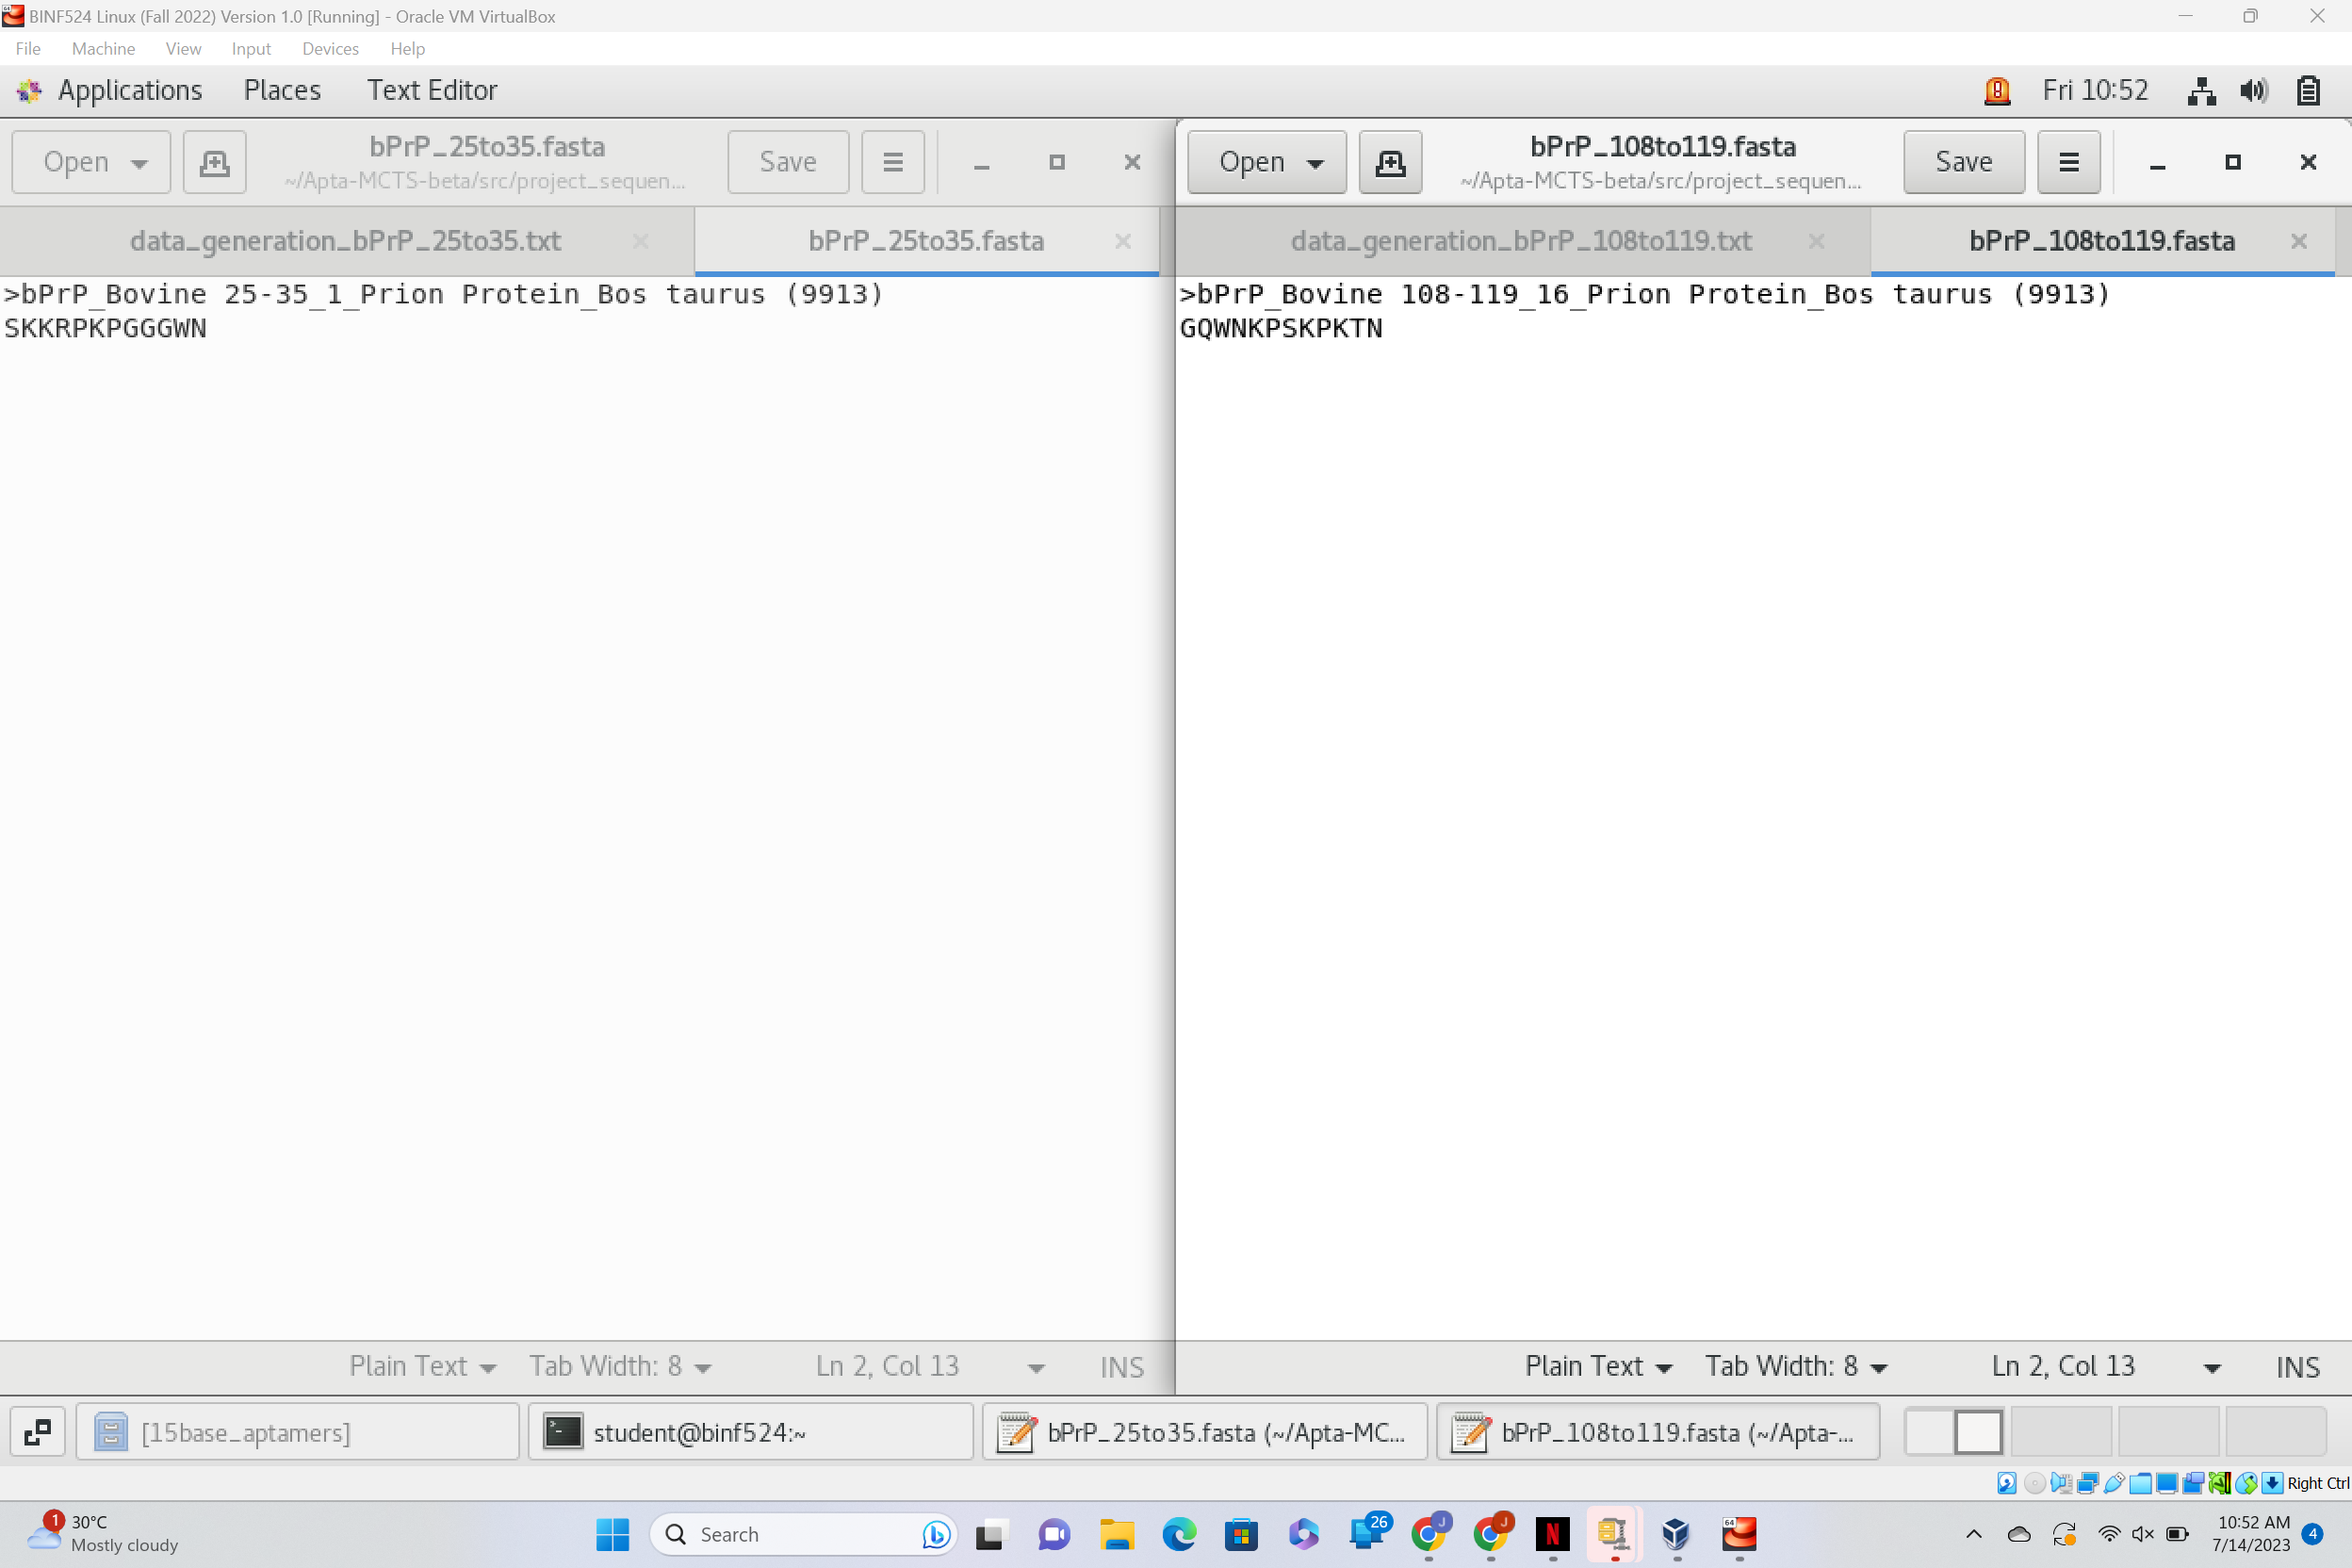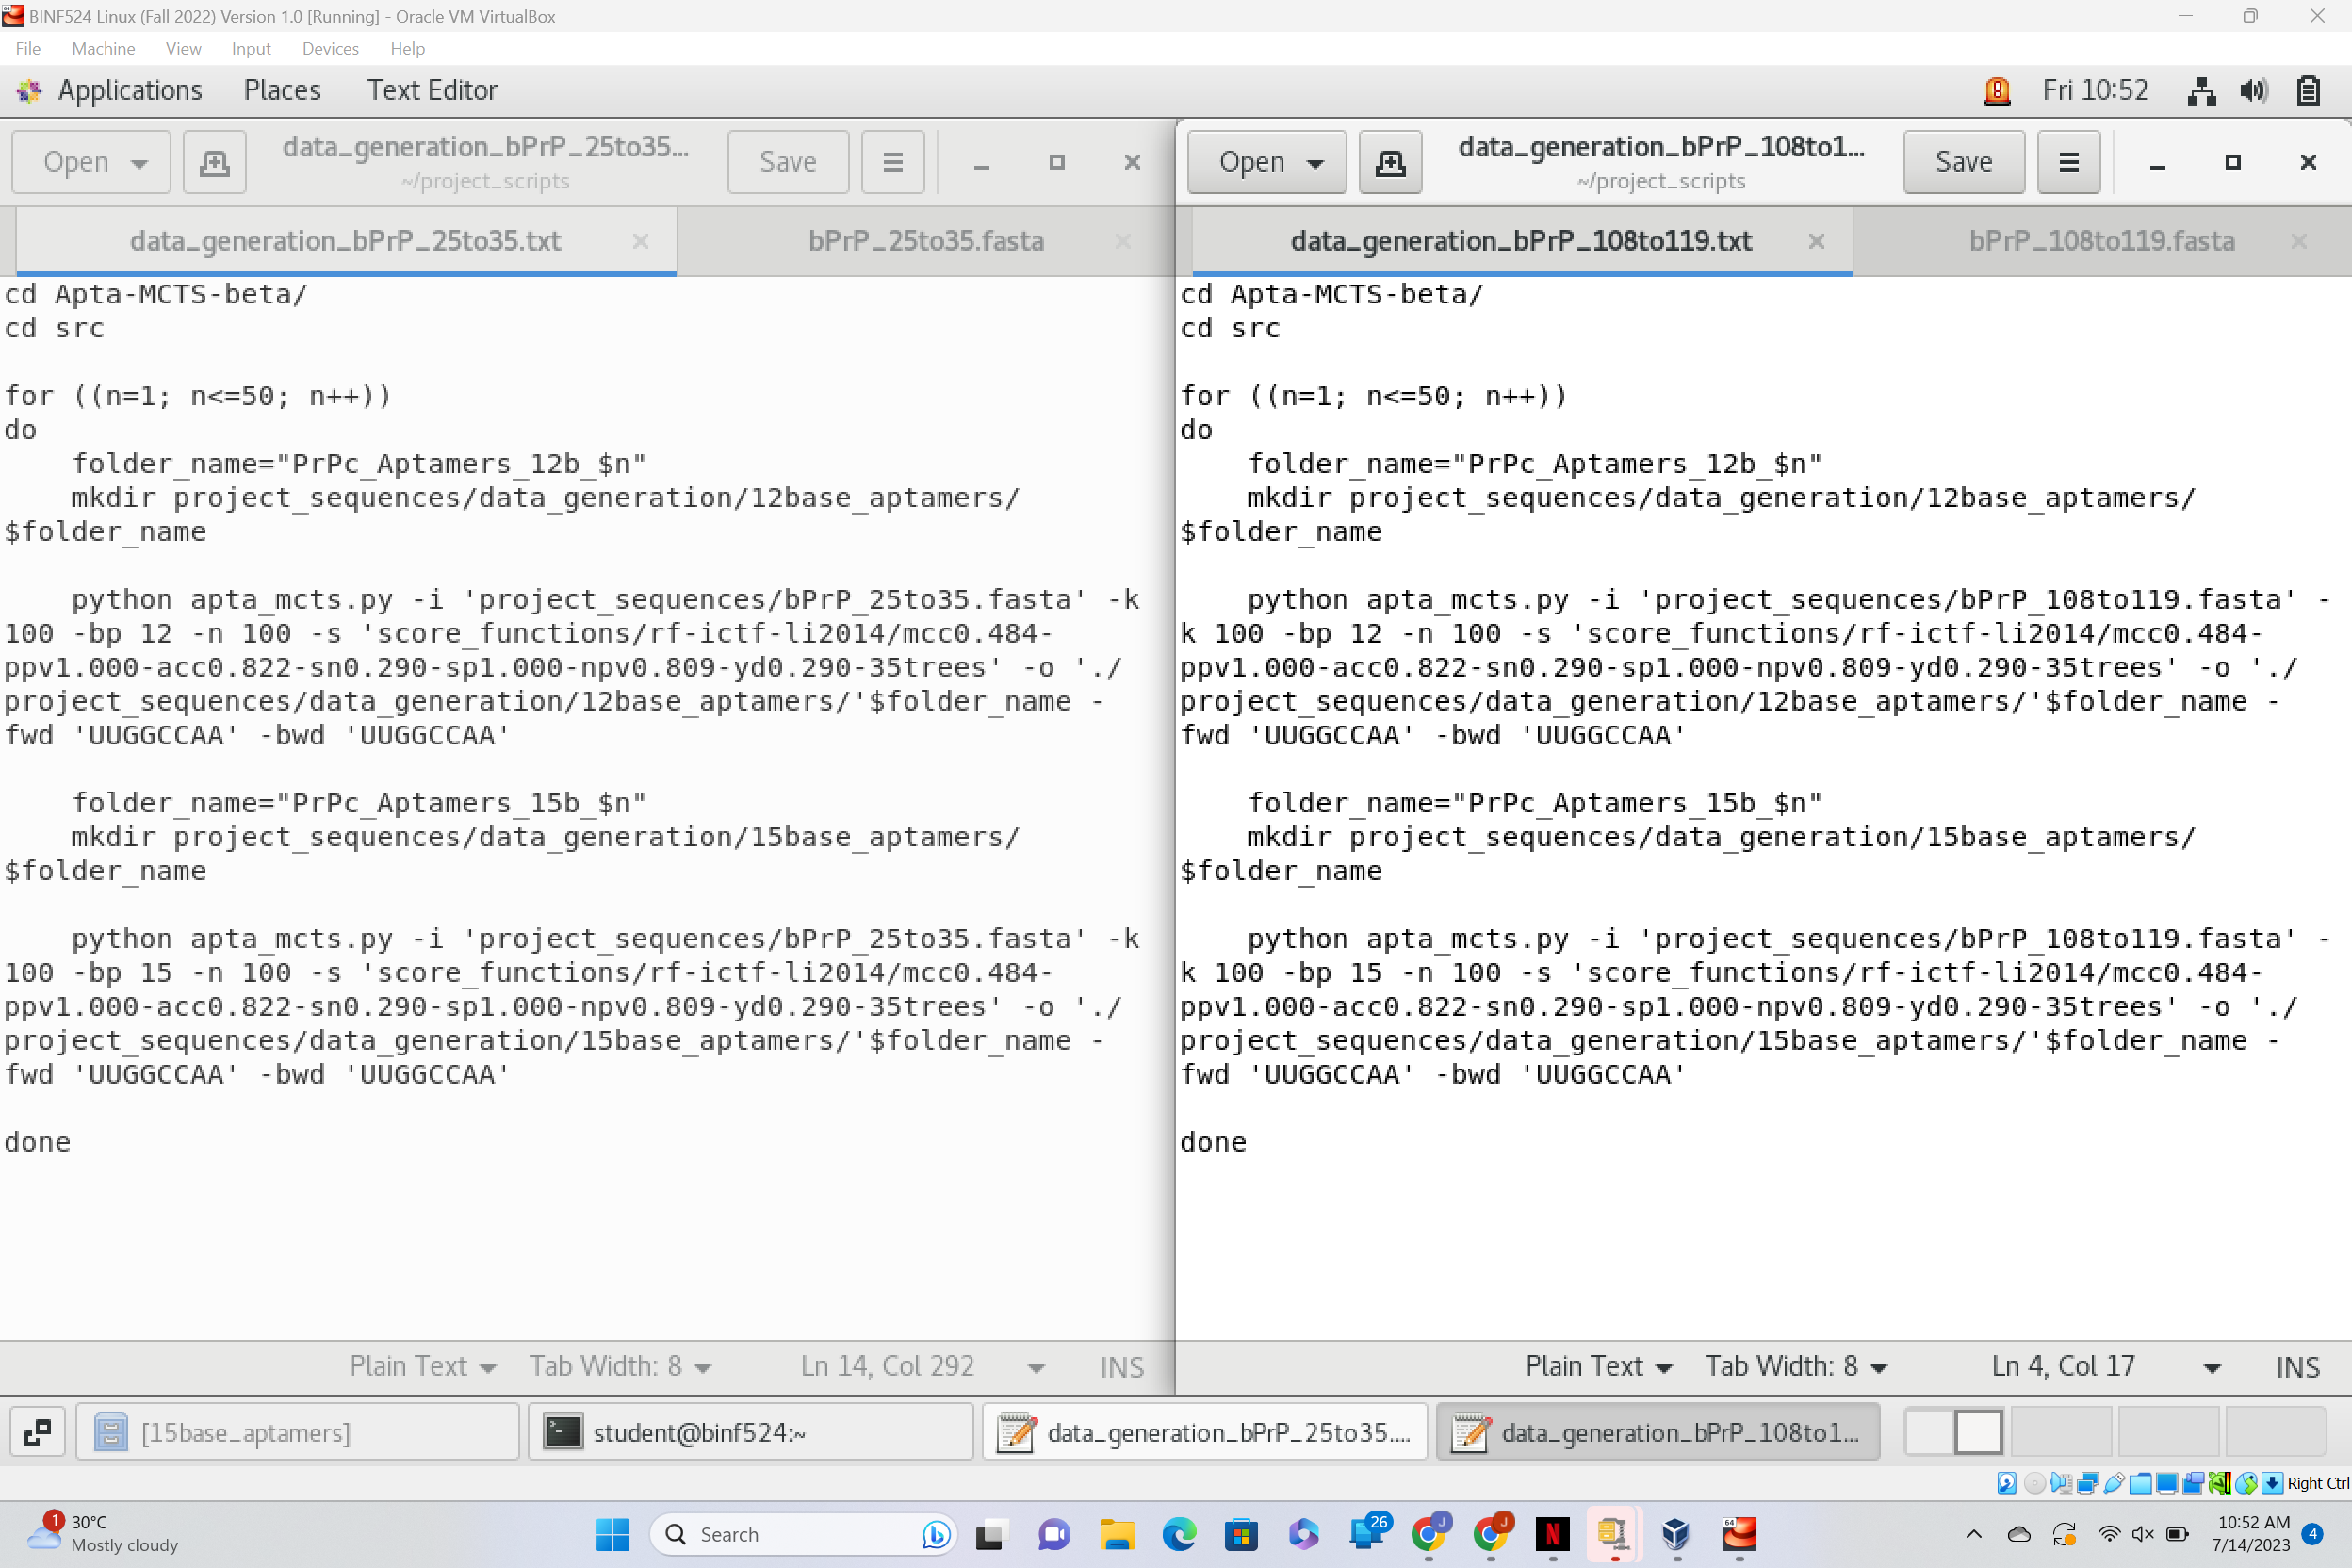

You'll notice that these two scripts output to the same pair of folders. That's an error I realized after I started running them. My solution was really just to move the results of (25-35) into a new folder, and then copy and empty '12_base_aptamers' and '15_base_aptamers' back to the same location, to recieve the results of the next script. Not good, but I'm improving.

In both cases, the scripts took ~ 30 minutes to run.

Finally: Note that the start and end tags are both 'UUGGCCAA'. The purpose is to ensure a single "stem-loop" structure. In the dataset used for developing the 'kill_neighbors' program, the tags are flipped, which seems to produce much more inconsistent secondary structure. This is a potential confound.

# Import Data:

The files are all named redundantly(because Apta-MCTS names them based on the input file), and are placed into folders with different names. It complicates the process of reading them in, as it woun't be plausible to manually rename them as I did previously.

To do so, I'll import the folders into my Google Drive, and then bring the files into Colab iteratively.

## Exploration:

In [ ]:
import pandas as pd

In [ ]:
import os

file_path = "/content/drive/My Drive/bPrP_25to35/12base_aptamers/PrPc_Aptamers_12b_1/bPrP_Bovine 25-35_1_Prion Protein_Bos taurus (9913).csv"
print("File path:", file_path)
print("File exists:", os.path.exists(file_path))

File path: /content/drive/My Drive/bPrP_25to35/12base_aptamers/PrPc_Aptamers_12b_1/bPrP_Bovine 25-35_1_Prion Protein_Bos taurus (9913).csv
File exists: False


In [ ]:
df = pd.read_csv(file_path)
print(df)

In [ ]:
df.to_csv('data.csv', index=False)

To iterate:

In [ ]:
for n in range (1, 50+1):
  file_path = "/content/drive/My Drive/bPrP_25to35/12base_aptamers"
  iter_path = "/PrPc_Aptamers_12b_"+str(n)+"/bPrP_Bovine 25-35_1_Prion Protein_Bos taurus (9913).csv"
  file_path = file_path + iter_path
  print("File path:", file_path)
  print("File exists:", os.path.exists(file_path))

File path: /content/drive/My Drive/bPrP_25to35/12base_aptamers/PrPc_Aptamers_12b_1/bPrP_Bovine 25-35_1_Prion Protein_Bos taurus (9913).csv
File exists: True
File path: /content/drive/My Drive/bPrP_25to35/12base_aptamers/PrPc_Aptamers_12b_2/bPrP_Bovine 25-35_1_Prion Protein_Bos taurus (9913).csv
File exists: True
File path: /content/drive/My Drive/bPrP_25to35/12base_aptamers/PrPc_Aptamers_12b_3/bPrP_Bovine 25-35_1_Prion Protein_Bos taurus (9913).csv
File exists: True
File path: /content/drive/My Drive/bPrP_25to35/12base_aptamers/PrPc_Aptamers_12b_4/bPrP_Bovine 25-35_1_Prion Protein_Bos taurus (9913).csv
File exists: True
File path: /content/drive/My Drive/bPrP_25to35/12base_aptamers/PrPc_Aptamers_12b_5/bPrP_Bovine 25-35_1_Prion Protein_Bos taurus (9913).csv
File exists: True
File path: /content/drive/My Drive/bPrP_25to35/12base_aptamers/PrPc_Aptamers_12b_6/bPrP_Bovine 25-35_1_Prion Protein_Bos taurus (9913).csv
File exists: True
File path: /content/drive/My Drive/bPrP_25to35/12base_apta

In [ ]:
import pandas as pd

To also spit out a .csv file, which is what 'kill_neighbors' runs on.


In [ ]:
file_lists = {}

In [ ]:
fl = []
for n in range (1, 50+1):
  file_path = "/content/drive/My Drive/bPrP_25to35/12base_aptamers"
  iter_path = "/PrPc_Aptamers_12b_"+str(n)+"/bPrP_Bovine 25-35_1_Prion Protein_Bos taurus (9913).csv"
  file_path = file_path + iter_path
  print("File path:", file_path)
  print("File exists:", os.path.exists(file_path))
  df = pd.read_csv(file_path)
  df.to_csv(file_path, index=False)
  fl.append(file_path)

#To preempt any tedious work in making the objects.
file_lists['bPrP_25to35/12base_aptamers'] = fl

File path: /content/drive/My Drive/bPrP_25to35/12base_aptamers/PrPc_Aptamers_12b_1/bPrP_Bovine 25-35_1_Prion Protein_Bos taurus (9913).csv
File exists: True


## Done:

In [ ]:
import os
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_lists = {}

In [ ]:
fl = []
for n in range (1, 50+1):
  file_path = "/content/drive/My Drive/bPrP_25to35/12base_aptamers"
  iter_path = "/PrPc_Aptamers_12b_"+str(n)+"/bPrP_Bovine 25-35_1_Prion Protein_Bos taurus (9913).csv"
  file_path = file_path + iter_path
  #print("File path:", file_path)
  #print("File exists:", os.path.exists(file_path))
  df = pd.read_csv(file_path)

  name = 'bPrP_25to35_12b_'+str(n)

  df.to_csv(name, index=False)
  fl.append(name)

#To preempt any tedious work in making the objects.
file_lists['bPrP_25to35/12base_aptamers'] = fl

In [ ]:
file_lists

I'll come back and iterate this later for the other 3/4 groups. What I have here is 50 * (up to) 100 = 5,000 sequences. Because 'Kill_Neighbors' creates an n x n matrix of values, that adds up to a matrix with ~25 million values.
So, let's just see if Colab will even let me run that, first.

# Function Definitions:

(Lifted directly from 'Kill-Neighbors Operationalized -- Collapse and run all.)'

## Installing packages and such:

In [ ]:
pip install tn93 --q

In [ ]:
pip install Bio --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 25.8 MB/s eta 0:00:00


In [ ]:
import tn93

In [ ]:
import pandas as pd

In [ ]:
from tn93 import tn93 as model

In [ ]:
from Bio import SeqIO

## 'make_necessary_objects' function

In [ ]:
def make_necessary_objects(file_list):
  frames = []
  for file in file_list:
    name = file + 'df'
    name = pd.read_csv(file, delimiter=',', encoding_errors = 'replace')
    name['file'] = file
    frames.append(name)
  fin_df = pd.concat(frames)
  #Make the 'API_dict'
  o_seqs = fin_df.drop(['secondary_structure', 'minimum_free_energy', 'file'],axis=1)
  o_seqs = o_seqs.values
  API_dict = {}
  for n in o_seqs:
    API_dict[n[1]] = n[0]
  #Make the 'E_dict'
  e_seqs = fin_df.drop(['aptamer_protein_interaction_score','secondary_structure', 'file'],axis=1)
  e_seqs = e_seqs.values
  e_seqs
  E_dict = {}
  for n in e_seqs:
    E_dict[n[0]] = n[1]
  #Make 'pairwise_tn_df'
  pairwise_tn = []
  for n in API_dict:
    row = []
    for m in API_dict:
      try: #A few of the pairs return a 'math domain error'
        row.append(float(tamura_nei(n,m)[2]))
      except:
        #print('Math_error', n,m)
        row.append(1.0)    #Impute the maximum distance.
    pairwise_tn.append(row)
  pairwise_tn_df = pd.DataFrame(pairwise_tn, columns=API_dict, index=API_dict)

  #Return everything:
  return(fin_df, API_dict, E_dict, pairwise_tn_df)

## Tamura_Nei Distance function:

In [ ]:
def tamura_nei(s1,s2):
  #Make the SeqRecord objects for each.
  seq1 = SeqIO.SeqRecord(seq=s1)
  seq1.id=s1
  seq2 = SeqIO.SeqRecord(seq=s2)
  seq2.id=s2
  #And feed into the model.
  tn_model = model.TN93(minimum_overlap=8)
  distance = tn_model.tn93_distance(seq1, seq2, "RESOLVE")
  #The output looks like a list, but it isn't. Annoying.
  distance = distance.split(',')
  return(distance)

## get_neighbors: Function.

In [ ]:
def get_neighbors(pairwise_tn_df, D=0.1):
  groups = {} #Since each group is now a tuple, encoding the whole thing as a dictionary may prove useful.

  for index, row in pairwise_tn_df.iterrows():
      centroid = (f"{index}")
      neighbors = []
      for column, value in row.items():
          if float(f"{value}") <= D and float(f"{value}") != 0: #Add self-match condition.
            neighbors.append(f"{column}")

      #Add to the dictionary:
      groups[centroid] = neighbors

  return(groups)

## Hit-list:

1. 'NS': The first algorithm that I came up with was: a. Look at the sizes of all neighborhoods, and determine the maximim size. b. For all of that size, determine which sequence has the lowest API-score. c. Add that sequence to the hit-list, to be pruned. -- Note that sequences are prioritized for pruning by proximity to a sequence that has a lot of neighbors, by "neighborhood size".

2. 'API': Another potential algorithm: a. Look for all sequences which have the lowest API score in their own neighborhood. b. Of these, determine which has the largest neighborhood (is the most redundant), and add it to the hit-list.

In both cases, the function needs to return a "stop"  or something like it, if the largest group size is at or below the threshold 'N'. This would be how we iterate and stop, progressively weeding out sequences until we reach the desired size. Unless... maybe doing that is pointless.

### 'NS' Function

In [ ]:
def NS(inp):
  hit_list = []
  #This block simply gives the maximum size of any neighborhood.
  ls = []
  for n in inp:
    ls.append(len(inp[n]))
  ml = max(ls)
  #Iterate this block based on whether the loop has found something to prune yet:
  for m in range(0, ml):
    if len(hit_list) == 0:
      #Looking at all neighborhoods of this maximum size.
      for n in inp:
        if len(inp[n]) == (ml-m):  #Notice the new '-m' condition.
          #Create an output list.
          lw_APIs = []
          #Append the centroid
          lw_APIs.append([n, API_dict[n]])
          for i in inp[n]:
            #Append the neighbors
            lw_APIs.append([i,API_dict[i]])

          #To generate the spread of API scores in each list.
          lAPIs = []
          for j in lw_APIs:
            lAPIs.append(j[1])

          #Add all the prunable sequences to the hit-list:
          for j in lw_APIs:
            if j[1] == min(lAPIs) and j[1] != max(lAPIs):
              hit_list.append(j)

  return ('hit_list:', hit_list)

### API Function:

In [ ]:
def API(inp):
  hit_list = []
  provis_hit_list = []

  #First, to identify all sequences which are of the minimum API score in their own neighborhoood.
  for n in inp:
    #Create an output list.
    lw_APIs = []
    #Append the centroid
    lw_APIs.append([n, API_dict[n]])
    for i in inp[n]:
      #Append the neighbors
      lw_APIs.append([i,API_dict[i]])

    #To generate the spread of API scores in each list.
    lAPIs = []
    for j in lw_APIs:
      lAPIs.append(j[1])

    #Select those centroids which are a local minimum
    if API_dict[n] == min(lAPIs) and API_dict[n] != max(lAPIs):
      provis_hit_list.append([n, API_dict[n], len(inp[n])])

  #Selection of sequences from the provisional hit-list which have the lowest score.
  seq_APIs = []
  for seq in provis_hit_list:
    seq_APIs.append(seq[1])

  for seq in provis_hit_list:
    if seq[1] == min(seq_APIs):
      hit_list.append(seq)

  return(hit_list)

### API_E Function:

Added in this version of the program. If there are only impasse solutions at

In [ ]:
def API_E(inp):
  hit_list = []
  provis_hit_list = []

  #First, to identify all sequences which are of the minimum API score in their own neighborhoood.
  for n in inp:
    #Create an output list.
    lw_APIs = []
    #Append the centroid
    lw_APIs.append([n, API_dict[n],E_dict[n]])
    for i in inp[n]:
      #Append the neighbors
      lw_APIs.append([i,API_dict[i],E_dict[i]])

    #To generate the spread of API and E scores in each list.
    lAPIs = []
    lEs = []
    for j in lw_APIs:
      lAPIs.append(j[1])
      lEs.append(j[2])

    #Select those centroids which are a local minimum
    if API_dict[n] == min(lAPIs) and API_dict[n] != max(lAPIs):
      provis_hit_list.append([n, API_dict[n], len(inp[n])])


    #From the impasse solutions (where all neighbors have the same API_score, and so min(lAPIs) == max(lAPIs)),     # This section generates the differing behavior from 'API'
    #take the solution with the least free energy change (max value), and add it to the hit-list.
    elif API_dict[n] == min(lAPIs) and API_dict[n] == max(lAPIs):
      if E_dict[n] == max(lEs) and E_dict[n] != min(lEs):
        provis_hit_list.append([n, API_dict[n], len(inp[n])])

  #Selection of sequences from the provisional hit-list which have the lowest API score.
  seq_APIs = []
  for seq in provis_hit_list:
    seq_APIs.append(seq[1])

  for seq in provis_hit_list:
    if seq[1] == min(seq_APIs):
      hit_list.append(seq)

  return(hit_list)

### Combined Function:

In [ ]:
def hit_list(pairwise_tn_df, API_dict, D=0.1, alg='API_E'):
  inp = get_neighbors(pairwise_tn_df, D)
  if alg == 'NS':
    hl = NS(inp)
  elif alg == 'API':
    hl = API(inp)
  elif alg == 'API_E':
    hl = API_E(inp)
  elif alg != 'NS' and alg != 'API' and alg != 'API_E':
    print("Unaccepatable algorithm choice. Pick either: a. 'NS', b. 'API' or 'API_E'")

  hl_out = []
  for i in hl:
    hl_out.append(i[0])

  return(hl_out)

## Prune_Matrix

Remove all sequences on the hitlist from 'pairwise_tn_df.

In [ ]:
#Note that this and the pruning function are meant to recur:
#So to begin, input_df = pairwise_tn_df, but the next time, it will be the output of the prev. step
def prune_matrix(input_df, API_dict, D=0.1, alg='API'):
  pruned_df = input_df.copy()
  for seq in hit_list(input_df, API_dict, D, alg):
    pruned_df.drop([seq], axis=1, inplace=True)
    pruned_df.drop([seq], axis=0, inplace=True)
  return(pruned_df)

##. Kill_Neighbors:

Finally, the assembly:

1. Take in 'API_dict' and 'pairwise_tn_df'.

2. ['get_neighbors'->'build_hitlist'-> 'prune_matrix'] x Iterate until a cutoff is reached.

In [ ]:
def kill_neighbors(pairwise_tn_df, API_dict, E_dict, D=0.1, alg='API', lim=100, show=''):
  input_df = pairwise_tn_df.copy()

  count = 0
  output_dim = [(0, 0), input_df.values.shape]
  while count < lim and output_dim[count+1] != output_dim[count]:
    count +=1

    #A quick way to perhaps make the step-wise output available.   #Editted to make the names more intuitive.
    neighborhood_list = get_neighbors(input_df, D)
    if show == 'get_neighbors':
      print(neighborhood_list)
    kill_list = hit_list(input_df, API_dict, D, alg)
    if show == 'hit_list':
      print(kill_list)
    output_df = prune_matrix(input_df, API_dict, D, alg)
    if show == 'pairwise_tn_df':
      print(output_df)

    #The aim of doing this is that you should be able to see "convergence."
    #If the matrix from two successive iterations is the same size, the
    output_dim.append(output_df.values.shape)
    if show == 'dims':
      print(output_dim[count+1])
    input_df = output_df.copy()

  #Outputs the final distance matrix:
  if show == 'dist':
    return(output_df)

  else:
    survivors = []
    for i in output_df.columns:
      survivors.append([i, API_dict[i], E_dict[i]])
      survivors_df = pd.DataFrame(survivors, columns=['sequence','API_score', 'Free_Energy_Change'])
      survivors_df
    return(survivors_df)

# Usage:

## To test, let's start with a subset of the data:

In [ ]:
file_lists['bPrP_25to35/12base_aptamers'] [0:5]

In [ ]:
All_Sequences, API_dict, E_dict, pairwise_tn_df = make_necessary_objects(file_list=file_lists['bPrP_25to35/12base_aptamers'] [0:5])

In [ ]:
#The only one of these that the user really might need to see.....
All_Sequences

,aptamer_protein_interaction_score,primary_sequence,secondary_structure,minimum_free_energy,file
0,0.485714,UUGGCCAAAGCAGCACUGGUUUGGCCAA,.((((((((.((....)).)))))))).,-14.9,bPrP_25to35_12b_1
1,0.485714,UUGGCCAAAAACAGCACUGGUUGGCCAA,.(((((((...((....)).))))))).,-9.6,bPrP_25to35_12b_1
2,0.457143,UUGGCCAAAAAGCACUGGUUUUGGCCAA,.(((((((((........))))))))).,-12.2,bPrP_25to35_12b_1
3,0.457143,UUGGCCAAAACAGCACUGGUUUGGCCAA,.(((((((..((....))..))))))).,-12.6,bPrP_25to35_12b_1
4,0.457143,UUGGCCAAAAAAGCACUGGUUUGGCCAA,.((((((((..........)))))))).,-10.3,bPrP_25to35_12b_1
...,...,...,...,...,...
78,0.200000,UUGGCCAAGUAGCCCGGGUAUUGGCCAA,.(((((((.((.(...).))))))))).,-10.2,bPrP_25to35_12b_5
79,0.200000,UUGGCCAAACCAGGGUCUCGUUGGCCAA,.(((((((.(.((...)).)))))))).,-9.5,bPrP_25to35_12b_5
80,0.200000,UUGGCCAACCCGGGUCUACUUUGGCCAA,.(((((((...((.....))))))))).,-10.3,bPrP_25to35_12b_5
81,0.200000,UUGGCCAAGUCGUAGGUCUAUUGGCCAA,.((((((((.(....).))..)))))).,-10.4,bPrP_25to35_12b_5


In [ ]:
test = kill_neighbors(pairwise_tn_df, API_dict, E_dict, D=0.4, alg='API', lim=100, show='')
test

,sequence,API_score,Free_Energy_Change
0,UUGGCCAAAGCAGCACUGGUUUGGCCAA,0.485714,-14.9
1,UUGGCCAAAAACAGCACUGGUUGGCCAA,0.485714,-9.6
2,UUGGCCAAUUUAUGGUCGGAUUGGCCAA,0.514286,-13.4
3,UUGGCCAAGAUUAUGGUCUGUUGGCCAA,0.428571,-11.4
4,UUGGCCAAAGGGUACGGAUUUUGGCCAA,0.485714,-12.6


## Good! And it didn't take too long. Let's use up a bit more of the data.

In [ ]:
%%time
All_Sequences, API_dict, E_dict, pairwise_tn_df = make_necessary_objects(file_list=file_lists['bPrP_25to35/12base_aptamers'][0:10])

In [ ]:
pairwise_tn_df.to_csv('pairwise_tn_matrix:bPrP_25to35_12b', index=False)

In [ ]:
#The only one of these that the user really might need to see.....
All_Sequences

,aptamer_protein_interaction_score,primary_sequence,secondary_structure,minimum_free_energy,file
0,0.485714,UUGGCCAAAGCAGCACUGGUUUGGCCAA,.((((((((.((....)).)))))))).,-14.9,bPrP_25to35_12b_1
1,0.485714,UUGGCCAAAAACAGCACUGGUUGGCCAA,.(((((((...((....)).))))))).,-9.6,bPrP_25to35_12b_1
2,0.457143,UUGGCCAAAAAGCACUGGUUUUGGCCAA,.(((((((((........))))))))).,-12.2,bPrP_25to35_12b_1
3,0.457143,UUGGCCAAAACAGCACUGGUUUGGCCAA,.(((((((..((....))..))))))).,-12.6,bPrP_25to35_12b_1
4,0.457143,UUGGCCAAAAAAGCACUGGUUUGGCCAA,.((((((((..........)))))))).,-10.3,bPrP_25to35_12b_1
...,...,...,...,...,...
71,0.200000,UUGGCCAAAGUGGCUGACCCUUGGCCAA,.(((((((.(.((....)))))))))).,-12.2,bPrP_25to35_12b_10
72,0.200000,UUGGCCAAAGGCUAUGAUGAUUGGCCAA,.(((((((...(......).))))))).,-9.3,bPrP_25to35_12b_10
73,0.200000,UUGGCCAAUGACAUUAUAGCUUGGCCAA,.(((((((.(.(......))))))))).,-9.6,bPrP_25to35_12b_10
74,0.142857,UUGGCCAAGACCGGUGGCAAUUGGCCAA,.(((((((..((...))...))))))).,-11.3,bPrP_25to35_12b_10


## Combinations Experiment:

In attempting to utilize all the data, all at once, I run into a wall, which is that as the number of sequences used doubles, the size of the matrix is quadrupled. I think that the solution here is the same "combinations" experiment I've been meaning to run.

### Exploration:

In [ ]:
All_Sequences, API_dict, E_dict, pairwise_tn_df = make_necessary_objects(file_list=file_lists['bPrP_25to35/12base_aptamers'])
test = kill_neighbors(pairwise_tn_df, API_dict, E_dict, D=0.4, alg='API', lim=100, show='')
print(test)

In [ ]:
print(pairwise_tn_df)

In [ ]:
for n in range(5,25, 5):
  for m in range (1,50-n,n):
    All_Sequences, API_dict, E_dict, pairwise_tn_df = make_necessary_objects(file_list=file_lists['bPrP_25to35/12base_aptamers'][m:(m+n)])
    test = kill_neighbors(pairwise_tn_df, API_dict, E_dict, D=0.4, alg='API_E', lim=100, show='')
    print('Range is files:', m, 'to', (m+n-1))
    print(test)

In [ ]:
count = 0
for n in range(5,25, 5):
  for m in range (1,50-n,n):
    print(n,m,m+n)
    count += 1
    print(count)

In [ ]:
test = []
for n in range(5,25, 5):
  for m in range (1,50-n,n):
    test.append([n,m,m+n-1])
    print(test[-1])

[5, 1, 5]
[5, 6, 10]
[5, 11, 15]
[5, 16, 20]
[5, 21, 25]
[5, 26, 30]
[5, 31, 35]
[5, 36, 40]
[5, 41, 45]
[10, 1, 10]
[10, 11, 20]
[10, 21, 30]
[10, 31, 40]
[15, 1, 15]
[15, 16, 30]
[15, 31, 45]
[20, 1, 20]
[20, 21, 40]


In [ ]:
nums = [5,10,25]
for n in nums:
  for m in range (1,50-n,n):
    All_Sequences, API_dict, E_dict, pairwise_tn_df = make_necessary_objects(file_list=file_lists['bPrP_25to35/12base_aptamers'][m:(m+n)])
    test = kill_neighbors(pairwise_tn_df, API_dict, E_dict, D=0.4, alg='API_E', lim=100, show='')
    print('Range is files:', m, 'to', (m+n-1))
    print(test)

In [ ]:
test = []
nums = [5,10,25]
for n in nums:
  for m in range (1,(51-n),n):
    test.append([n,m,m+n-1])
    print(test[-1])

In [ ]:
test = []
nums = [5,10,25]
for n in nums:
  for m in range (1,(50-n)+2,n):
    test.append([n,m,m+n-1])
    print(test[-1])

[5, 1, 5]
[5, 6, 10]
[5, 11, 15]
[5, 16, 20]
[5, 21, 25]
[5, 26, 30]
[5, 31, 35]
[5, 36, 40]
[5, 41, 45]
[5, 46, 50]
[10, 1, 10]
[10, 11, 20]
[10, 21, 30]
[10, 31, 40]
[10, 41, 50]
[25, 1, 25]
[25, 26, 50]


### Test:

In [ ]:
results = {}
nums = [5,10,25]
for n in nums:
  for m in range (1,(50-n)+2,n):
    #Errg, it's an indexing thing.
    x = m-1
    y = m+n-2
    All_Sequences, API_dict, E_dict, pairwise_tn_df = make_necessary_objects(file_list=file_lists['bPrP_25to35/12base_aptamers'][x:y])
    out = kill_neighbors(pairwise_tn_df, API_dict, E_dict, D=0.4, alg='API_E', lim=100, show='')
    print('Range is files:', x+1, 'to', y+1)
    results[str(x)+'-'+str(y)] = out
    print(out)

    name = 'bPrP_25to35_12b_kill_neighbors_output_['+str(x+1)+'-'+str(y+1)+']'
    out.to_csv(name, index=False)

Range is files: 1 to 5
                       sequence  API_score  Free_Energy_Change
0  UUGGCCAAAGCAGCACUGGUUUGGCCAA   0.485714               -14.9
1  UUGGCCAAAAACAGCACUGGUUGGCCAA   0.485714                -9.6
2  UUGGCCAAUUUAUGGUCGGAUUGGCCAA   0.514286               -13.4
3  UUGGCCAAGAUUAUGGUCUGUUGGCCAA   0.428571               -11.4
4  UUGGCCAAAGGGUACGGAUUUUGGCCAA   0.485714               -12.6
Range is files: 6 to 10
                       sequence  API_score  Free_Energy_Change
0  UUGGCCAAAGAGGUUGGAUUUUGGCCAA   0.514286               -11.4
1  UUGGCCAAACAGAGGUUGGAUUGGCCAA   0.514286               -10.6
Range is files: 11 to 15
                       sequence  API_score  Free_Energy_Change
0  UUGGCCAACAGGCAGCUGGUUUGGCCAA   0.514286               -13.1
1  UUGGCCAAAGUUUGGCUAAAUUGGCCAA   0.457143               -10.1
2  UUGGCCAACGGAUUUGGAGGUUGGCCAA   0.485714               -13.7
Range is files: 16 to 20
                       sequence  API_score  Free_Energy_Change
0  UUGGCCAAAGUUGGUAAA

In [ ]:
results = {}
nums = [10,25]
for n in nums:
  for m in range (1,(50-n)+2,n):
    #Errg, it's an indexing thing.
    x = m-1
    y = m+n-2
    All_Sequences, API_dict, E_dict, pairwise_tn_df = make_necessary_objects(file_list=file_lists['bPrP_25to35/12base_aptamers'][x:y])
    out = kill_neighbors(pairwise_tn_df, API_dict, E_dict, D=0.4, alg='API_E', lim=100, show='')
    print('Range is files:', x+1, 'to', y+1)
    results[str(x)+'-'+str(y)] = out
    print(out)

    name = 'bPrP_25to35_12b_kill_neighbors_output_['+str(x+1)+'-'+str(y+1)+']'
    out.to_csv(name, index=False)

Range is files: 1 to 10
                       sequence  API_score  Free_Energy_Change
0  UUGGCCAAUUUAUGGUCGGAUUGGCCAA   0.514286               -13.4
1  UUGGCCAAAGAGGUUGGAUUUUGGCCAA   0.514286               -11.4
Range is files: 11 to 20
                       sequence  API_score  Free_Energy_Change
0  UUGGCCAACAGGCAGCUGGUUUGGCCAA   0.514286               -13.1
1  UUGGCCAAGUUUGCACAGCGUUGGCCAA   0.485714               -11.4
2  UUGGCCAACGGAUUUGGAGGUUGGCCAA   0.485714               -13.7
Range is files: 21 to 30
                       sequence  API_score  Free_Energy_Change
0  UUGGCCAAGGACAGCUAGGGUUGGCCAA   0.514286               -10.0
1  UUGGCCAACGGACAGCUAGGUUGGCCAA   0.485714               -13.7
2  UUGGCCAAUUGGACAGCUAGUUGGCCAA   0.485714               -16.4
3  UUGGCCAAGGACAGCACGGGUUGGCCAA   0.514286               -10.0
4  UUGGCCAAAAAGCAUUGGAUUUGGCCAA   0.514286               -10.3
Range is files: 31 to 40
                       sequence  API_score  Free_Energy_Change
0  UUGGCCAAAGGCAUUG

Success!

In [ ]:
results = {}
nums = [10]
for n in nums:
  for m in range (1,(50-n)+2,n):
    #Errg, it's an indexing thing.
    x = m-1
    y = m+n-2
    All_Sequences, API_dict, E_dict, pairwise_tn_df = make_necessary_objects(file_list=file_lists['bPrP_25to35/12base_aptamers'][x:y])
    out = kill_neighbors(pairwise_tn_df, API_dict, E_dict, D=0.4, alg='API_E', lim=100, show='')
    print('Range is files:', x+1, 'to', y+1)
    results[str(x)+'-'+str(y)] = out
    print(out)

    name = 'bPrP_25to35_12b_kill_neighbors_output_['+str(x+1)+'-'+str(y+1)+']'
    out.to_csv(name, index=False)

Range is files: 1 to 10
                       sequence  API_score  Free_Energy_Change
0  UUGGCCAAUUUAUGGUCGGAUUGGCCAA   0.514286               -13.4
1  UUGGCCAAAGAGGUUGGAUUUUGGCCAA   0.514286               -11.4
Range is files: 11 to 20
                       sequence  API_score  Free_Energy_Change
0  UUGGCCAACAGGCAGCUGGUUUGGCCAA   0.514286               -13.1
1  UUGGCCAAGUUUGCACAGCGUUGGCCAA   0.485714               -11.4
2  UUGGCCAACGGAUUUGGAGGUUGGCCAA   0.485714               -13.7
Range is files: 21 to 30
                       sequence  API_score  Free_Energy_Change
0  UUGGCCAAGGACAGCUAGGGUUGGCCAA   0.514286               -10.0
1  UUGGCCAACGGACAGCUAGGUUGGCCAA   0.485714               -13.7
2  UUGGCCAAUUGGACAGCUAGUUGGCCAA   0.485714               -16.4
3  UUGGCCAAGGACAGCACGGGUUGGCCAA   0.514286               -10.0
4  UUGGCCAAAAAGCAUUGGAUUUGGCCAA   0.514286               -10.3
Range is files: 31 to 40
                       sequence  API_score  Free_Energy_Change
0  UUGGCCAAAGGCAUUG

Further work: Take the top sequences, and use code from the ViennaFold notebook to get back the secondary structure. Batch load them to RNAComposer. Take the resulting PDB files, and use code from the RNAComposer notebook to **Proudly Display(!)** their structures here.

Visualization: I like the n=10 set, because it doesn't take particularly long to run, and yields a good set of candidates.

In [ ]:
results

{'0-9':                        sequence  API_score  Free_Energy_Change
 0  UUGGCCAAUUUAUGGUCGGAUUGGCCAA   0.514286               -13.4
 1  UUGGCCAAAGAGGUUGGAUUUUGGCCAA   0.514286               -11.4,
 '10-19':                        sequence  API_score  Free_Energy_Change
 0  UUGGCCAACAGGCAGCUGGUUUGGCCAA   0.514286               -13.1
 1  UUGGCCAAGUUUGCACAGCGUUGGCCAA   0.485714               -11.4
 2  UUGGCCAACGGAUUUGGAGGUUGGCCAA   0.485714               -13.7,
 '20-29':                        sequence  API_score  Free_Energy_Change
 0  UUGGCCAAGGACAGCUAGGGUUGGCCAA   0.514286               -10.0
 1  UUGGCCAACGGACAGCUAGGUUGGCCAA   0.485714               -13.7
 2  UUGGCCAAUUGGACAGCUAGUUGGCCAA   0.485714               -16.4
 3  UUGGCCAAGGACAGCACGGGUUGGCCAA   0.514286               -10.0
 4  UUGGCCAAAAAGCAUUGGAUUUGGCCAA   0.514286               -10.3,
 '30-39':                        sequence  API_score  Free_Energy_Change
 0  UUGGCCAAAGGCAUUGGAUUUUGGCCAA   0.485714               -12.6
 1 

In [ ]:
quer = [results['0-9'], results['10-19'], results['20-29'], results['30-39'], results['40-49']]
n_equals_10_set = pd.concat(quer)
n_equals_10_set

,sequence,API_score,Free_Energy_Change
0,UUGGCCAAUUUAUGGUCGGAUUGGCCAA,0.514286,-13.4
1,UUGGCCAAAGAGGUUGGAUUUUGGCCAA,0.514286,-11.4
0,UUGGCCAACAGGCAGCUGGUUUGGCCAA,0.514286,-13.1
1,UUGGCCAAGUUUGCACAGCGUUGGCCAA,0.485714,-11.4
2,UUGGCCAACGGAUUUGGAGGUUGGCCAA,0.485714,-13.7
0,UUGGCCAAGGACAGCUAGGGUUGGCCAA,0.514286,-10.0
1,UUGGCCAACGGACAGCUAGGUUGGCCAA,0.485714,-13.7
2,UUGGCCAAUUGGACAGCUAGUUGGCCAA,0.485714,-16.4
3,UUGGCCAAGGACAGCACGGGUUGGCCAA,0.514286,-10.0
4,UUGGCCAAAAAGCAUUGGAUUUGGCCAA,0.514286,-10.3


In [ ]:
print(n_equals_10_set['sequence'])

0    UUGGCCAAUUUAUGGUCGGAUUGGCCAA
1    UUGGCCAAAGAGGUUGGAUUUUGGCCAA
0    UUGGCCAACAGGCAGCUGGUUUGGCCAA
1    UUGGCCAAGUUUGCACAGCGUUGGCCAA
2    UUGGCCAACGGAUUUGGAGGUUGGCCAA
0    UUGGCCAAGGACAGCUAGGGUUGGCCAA
1    UUGGCCAACGGACAGCUAGGUUGGCCAA
2    UUGGCCAAUUGGACAGCUAGUUGGCCAA
3    UUGGCCAAGGACAGCACGGGUUGGCCAA
4    UUGGCCAAAAAGCAUUGGAUUUGGCCAA
0    UUGGCCAAAGGCAUUGGAUUUUGGCCAA
1    UUGGCCAAUAUGUCGGCUGGUUGGCCAA
0    UUGGCCAACAGCAGCUGGGGUUGGCCAA
1    UUGGCCAAAGUUCAUUGGAUUUGGCCAA
Name: sequence, dtype: object


For all 5000 initial candidates, use a bit of R to:

1. Calculate mean and sd for each: API-Score and Free-Energy Change.

2. Scatter-plot API vs Free-Energy. Calculate and display r^2.

- Take a look at the 15 base sequences. See if there's any trend in top API scores.

- RNAComposer. Send the structures as a batch to RNAComposer. Send .pdb files to Dr. Bell, so he can start docking them with the .pdb file of the protein.

NGLViewer is good for visualizing MD-simulations.

It knows how to work with dcd files.

# Install and Use ViennaRNA separately.
(Collapse.)

Something we workied out some time ago (it's used by Apta-MCTS)

In [ ]:
#Path and version numbers for python
!which python
!python --version

/usr/local/bin/python
Python 3.10.6


In [ ]:
#Clearing the path aims to prevent the system being confused by
# two different versions of Python.
%env PYTHONPATH=

env: PYTHONPATH=


In [ ]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
Unpacking payload ...
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py37h27cfd23_1003
    - ca-certificates==2022.3.29=h06a4308_1
    - certifi==2021.10.8=py37h06a4308_2
    - cffi==1.15.0=py37hd667e15_1
    - charset-normalizer==2.0.4=pyhd3eb1b0_0
    - colorama==0.4.4=pyhd3eb1b0_0
    - conda-content-trust==0.1.1=pyhd3eb1b0_0
    - conda-package-handling==1.8.1=py37h7f8727e_0
    - conda==4.12.0=py37h06a4308_0
    - cryptography==36.0.0=py37h9ce1e76_0
    - idna==3.3=pyhd3eb1b0_0
    - ld_impl_linux-64==2.35.1=h7274673_9
    - libffi==3.3=he6710b0_2
    - libgcc-ng==9.3.0=h5101ec6_17
    - libgomp==9.3.0=h5101ec6_17
    - libstdcxx-ng==9.3.0=hd4cf53a_17
    - ncurses==6.3=h7f8727e_2
    - openssl==1.1.1n=h7f8727e_0
    - pip==21.2.2=py37h06a4308_0
    - pycosat==0.6.3=py37h27cfd23_0
    - pycparser==2.21=pyhd3

--2023-07-20 23:47:10--  https://repo.continuum.io/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh [following]
--2023-07-20 23:47:11--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104996770 (100M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 5.11M 20s
    50K .......... .......... .........

In [ ]:
!conda install -c bioconda -y viennarna

Solving environment: \ | / - \ done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 23.5.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - viennarna


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.05.30 |       h06a4308_0         120 KB
    openssl-1.1.1u             |       h7f8727e_0         3.7 MB
    viennarna-2.4.13           |   py37hdbcaa40_2        10.5 MB  bioconda
    ------------------------------------------------------------
                                           Total:        14.3 MB

The following NEW packages will be INSTALLED:

  viennarna          bioconda/linux-64::viennarna-2.4.13-py37hdbcaa40_2

The following packages will be UPDATED:

  ca-certificates             

In [ ]:
%%script python3
import RNA
import sys
print(sys.version)


3.7.13 (default, Mar 29 2022, 02:18:16) 
[GCC 7.5.0]


# Tests:

In [ ]:
%%script python3
import RNA

print(RNA.fold('UUGGCCAAUUGGACAGCUAGUUGGCCAA'))

['.(((((((((((....))))))))))).', -16.399999618530273]


In [ ]:
%%script python3
import RNA
#It's unfortunately quite finnicky.

candidate_list = []
candidate_list.append('UUGGCCAAUUUAUGGUCGGAUUGGCCAA')
candidate_list.append('UUGGCCAAAGAGGUUGGAUUUUGGCCAA')
candidate_list.append('UUGGCCAACAGGCAGCUGGUUUGGCCAA')
candidate_list.append('UUGGCCAAGUUUGCACAGCGUUGGCCAA')
candidate_list.append('UUGGCCAACGGAUUUGGAGGUUGGCCAA')
candidate_list.append('UUGGCCAAGGACAGCUAGGGUUGGCCAA')
candidate_list.append('UUGGCCAACGGACAGCUAGGUUGGCCAA')
candidate_list.append('UUGGCCAAUUGGACAGCUAGUUGGCCAA')
candidate_list.append('UUGGCCAAGGACAGCACGGGUUGGCCAA')
candidate_list.append('UUGGCCAAAAAGCAUUGGAUUUGGCCAA')
candidate_list.append('UUGGCCAAAGGCAUUGGAUUUUGGCCAA')
candidate_list.append('UUGGCCAAUAUGUCGGCUGGUUGGCCAA')
candidate_list.append('UUGGCCAACAGCAGCUGGGGUUGGCCAA')
candidate_list.append('UUGGCCAAAGUUCAUUGGAUUUGGCCAA')

print('#List of candidate aptamers at 12 bases')
x = 0
for n in candidate_list:
  x += 1
  print('>candidate_'+str(x))
  print(n)
  print(RNA.fold(n)[0])
  print()

#List of candidate aptamers at 12 bases
>candidate_1
UUGGCCAAUUUAUGGUCGGAUUGGCCAA
.((((((((((......)))))))))).

>candidate_2
UUGGCCAAAGAGGUUGGAUUUUGGCCAA
.(((((((((........))))))))).

>candidate_3
UUGGCCAACAGGCAGCUGGUUUGGCCAA
.((((((((((....)))..))))))).

>candidate_4
UUGGCCAAGUUUGCACAGCGUUGGCCAA
.((((((((((.....))).))))))).

>candidate_5
UUGGCCAACGGAUUUGGAGGUUGGCCAA
.((((((((..........)))))))).

>candidate_6
UUGGCCAAGGACAGCUAGGGUUGGCCAA
.(((((((............))))))).

>candidate_7
UUGGCCAACGGACAGCUAGGUUGGCCAA
.((((((((..........)))))))).

>candidate_8
UUGGCCAAUUGGACAGCUAGUUGGCCAA
.(((((((((((....))))))))))).

>candidate_9
UUGGCCAAGGACAGCACGGGUUGGCCAA
.(((((((............))))))).

>candidate_10
UUGGCCAAAAAGCAUUGGAUUUGGCCAA
.((((((((..........)))))))).

>candidate_11
UUGGCCAAAGGCAUUGGAUUUUGGCCAA
.(((((((((........))))))))).

>candidate_12
UUGGCCAAUAUGUCGGCUGGUUGGCCAA
.((((((((..........)))))))).

>candidate_13
UUGGCCAACAGCAGCUGGGGUUGGCCAA
.((((((((..(....)..)))))))).

>candidate_14
UUGGCC

**To be updated as soon as I figure out a good way to display the candidate sequience 3D structures....**